In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Storyline 
- load data
- Know data
- Exploratory data analysis
- Feature Engineer
- Feature Selection
- Pipeline
- Model Building
- Hyperparamter tuning and cross validation
(solving the overfitting issue)

# Load Data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df = train_data
df2 = test_data

# Data Understanding

In [6]:
print('shape of TRAIN data:',df.shape)
for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values != 0:
        print(f'{col}:{missing_values}')

shape of TRAIN data: (891, 12)
Age:177
Cabin:687
Embarked:2


In [7]:
print('shape of TEST data:',df2.shape)
for col in df2.columns:
    missing_values = df2[col].isnull().sum()
    if missing_values != 0:
        print(f'{col}:{missing_values}')

shape of TEST data: (418, 11)
Age:86
Fare:1
Cabin:327


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df2.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Since we cannot remove outliers form the dataset because the outliers could represent real values for the passengers. Only way outliers could exist in the dataset is if the data was sampled wrongly. But we will go with no treating the outliers. However we will be checking the distribution of the missing values for the columns containing missing values**

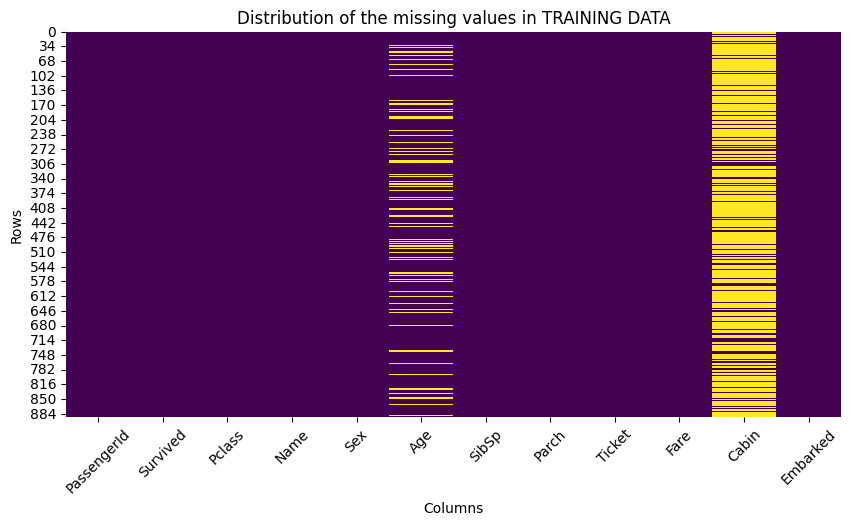

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull().astype(int), cmap='viridis', cbar=False)
plt.title('Distribution of the missing values in TRAINING DATA')
plt.ylabel('Rows')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

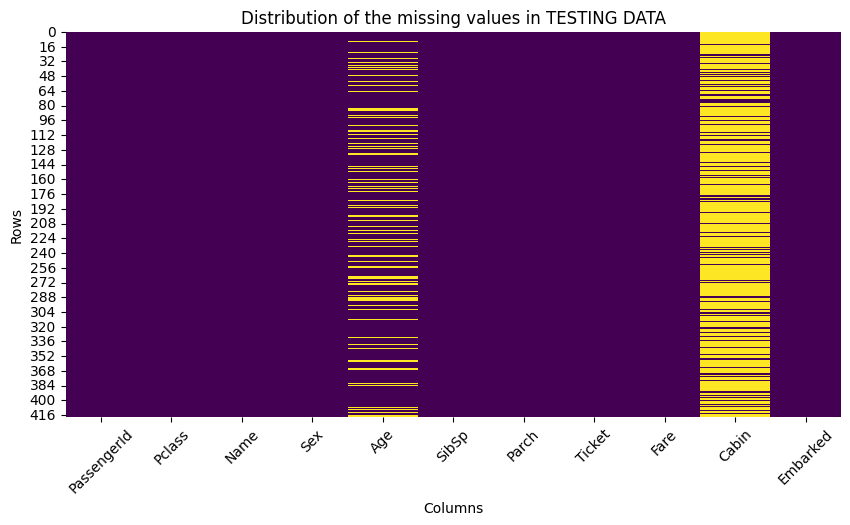

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.isnull().astype(int), cmap='viridis', cbar=False)
plt.title('Distribution of the missing values in TESTING DATA')
plt.ylabel('Rows')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

# Regression for Missing Values 

We will build a Regression model to predict the missing values in the `Age` column. We can just impute the missing values but we can experiment between predicted values and imputed values to check whether using a model results in better metrics overall.

In [12]:
# preparing dataset with target as Age column
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [13]:
print('unique values in Ticket:',df.Ticket.nunique())
print('unique values in Name:', df.Name.nunique())

unique values in Ticket: 681
unique values in Name: 891


In [14]:
df = df.drop(['PassengerId', 'Ticket', 'Name'], axis=1)
# dropping Cabin as well because of too many missing entries
df = df.drop('Cabin', axis=1)
df.tail(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


In [15]:
# Now we want rows where the Age column does not have missing values '''

train = df.dropna()
train.shape

(712, 8)

In [16]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

- Now let's check correlation for each columns with the `Age` column and peform Feature Selection for what feature is best in predicting the `Age` values.

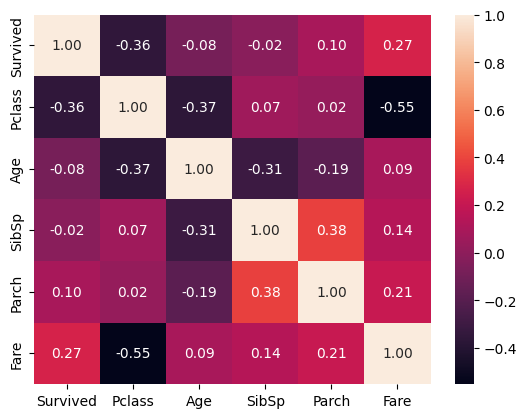

In [17]:
sns.heatmap(train.select_dtypes(exclude='object').corr(), annot=True, fmt='.2f')
plt.show()

In [18]:
X = train.drop(['Age'], axis=1)
y = train['Age']

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [20]:
numerical_features = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']
categorical_feature = ['Sex', 'Embarked']

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_feature)
    ]
)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [22]:
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logit', LinearRegression())
])

In [23]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Survived', 'Pclass',
                                                   'SibSp', 'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('logit', LinearRegression())])

In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [26]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.16562371707440215
9.77207859597492
148.86284424499854


# Feature Engineering 

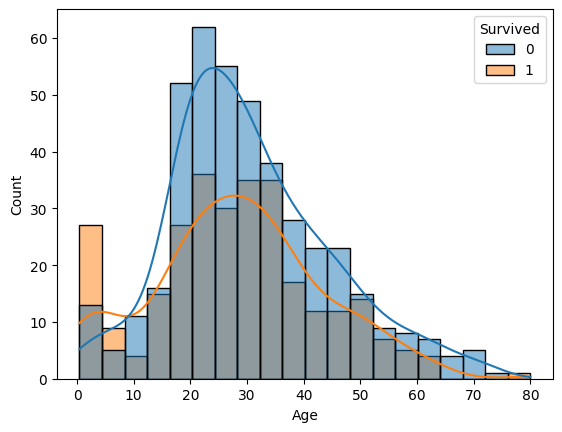

In [27]:
sns.histplot(data=df, x='Age', bins=20, kde=True, hue='Survived')
plt.show()

- The histogram with hue as `Survived` really shows some interestin pattern in the data. It looks like the children had a high survival chance. This is due to the reason that during life boat boarding the **women and children** were given prestige to board first.
- It will be smart to create feature that explicitly represent these two class. But since we have `Sex` feature which shows male and female we don't have to make another one to represent female as well.
- Rather we can make a `isChild` feature which will reprsent if the passenger is child or not. Since it is shown that children had a high survival rate. This can make our model generalize well.
- Similarly the histgram also shows less survival for the elderly people. If that is the case we can create another `isElderly` feature to represent the seniorcitizens.




In [30]:
df['isChild'] = np.where(df['Age'] < 16, 1, 0)
df['isElderly'] = np.where(df['Age'] > 60, 1, 0)
df.tail(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isChild,isElderly
889,1,1,male,26.0,0,0,30.00,C,0,0
890,0,3,male,32.0,0,0,7.75,Q,0,0


- Let's look at the `Fare` feature.
- The titanic boarded passenger of 3 different classes which were 1st, 2nd and 3rd class. The fare increases respective of the class of passenger. So 1st class tickets were the most expensive out of all, then 2nd and lastly 3rd.
- `Fare` 0 indicates that thery were labour force of the ship and not passengers.

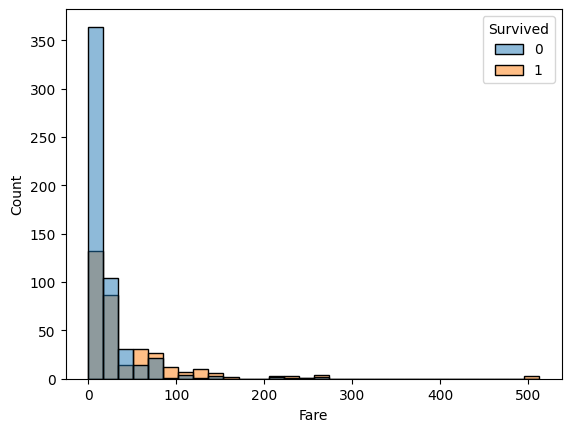

In [35]:
sns.histplot(data=df, x='Fare', hue='Survived', bins=30)
plt.show()

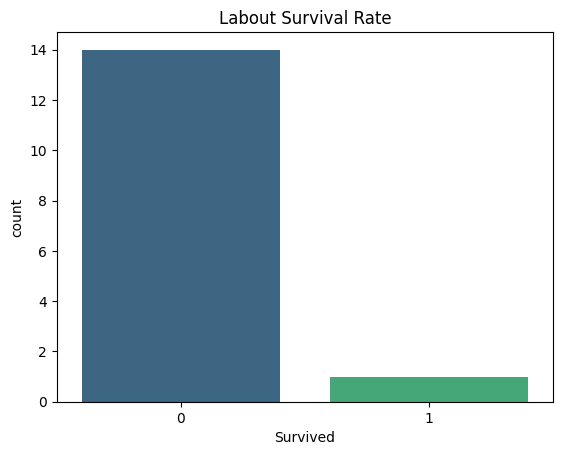

In [65]:
labour_survival = df[(df.Fare == 0) & (df.Age != 0)].Survived.value_counts()
sns.barplot(labour_survival, palette='viridis')
plt.title('Labout Survival Rate')
plt.show()

- The `Fare` feature shows some interesting patterns. After searching for `Fare` 0 and where `Age` is no 0. We found the labours in the titanic and after searching for how many survived out of them, we can clearly see out of 15 only 1 survived, indicating they had a very low survival rate approximately 6.67% chance.
- We can create a new feature to represent this labour class `isLabour`. This can help out model predict better if `Fare` is 0 and `Age` is not 0.

- Now from the `Fare` histogram we can see that the survival rate is less where is `Fare` is less and survival rate is higher after the `Fare` exceeds a certain range. From this information we can categorize the `Fare` feature into different classes representing different ranges of `Fare`. This could help our model generalize well as we will be passing a Descrete featre instead of a continuous one.

In [69]:
print('mean of the Fare column:',df.Fare.mean())
print('meadian of the Fare column:', df.Fare.median())

mean of the Fare column: 32.204207968574636
meadian of the Fare column: 14.4542


In [100]:
# bins for Fare 
bins = [0, 7.075, 14.4542, 32.20, 64.40, 130, np.inf]
labels = ['very low', 'low', 'mean', 'high', 'very high', 'luxury']

df['FareGroup'] = pd.cut(df['Fare'], bins=bins, labels=labels)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isChild,isElderly,isLabour,FareGroup
0,0,3,male,22.0,1,0,7.2500,S,0,0,0,low
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,very high
2,1,3,female,26.0,0,0,7.9250,S,0,0,0,low
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,high
4,0,3,male,35.0,0,0,8.0500,S,0,0,0,low


In [101]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age          177
SibSp          0
Parch          0
Fare           0
Embarked       2
isChild        0
isElderly      0
isLabour       0
FareGroup     15
dtype: int64